In [1]:
# Import the machine learning libraries.
import bs4 as bs
import urllib.request
import re
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
nltk.download('stopwords')
nltk.download('punkt')
import heapq

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
# Install BeautifulSoup 4.
!pip install beautifulsoup4

In [3]:
# Install lxml.
!pip install lxml

In [0]:
# Get the data source from the Wikipedia.
source = urllib.request.urlopen('https://en.wikipedia.org/wiki/Global_warming').read()

In [0]:
# Parse the data and create BeautifulSoup object.
soup = bs.BeautifulSoup(source,'lxml')

In [0]:
#soup.prettify()

In [0]:
# Fetch the data.
text = ""
for paragraph in soup.find_all('p'):
    text += paragraph.text

In [0]:
#print(text)

In [0]:
# Preprocess the data.
text = re.sub(r'\[[0-9]*\]',' ',text)
text = re.sub(r'\s+',' ',text)
clean_text = text.lower()
clean_text = re.sub(r'\W',' ',clean_text)
clean_text = re.sub(r'\d',' ',clean_text)
clean_text = re.sub(r'\s+',' ',clean_text)

In [0]:
#print(clean_text)

<function matplotlib.pyplot.show>

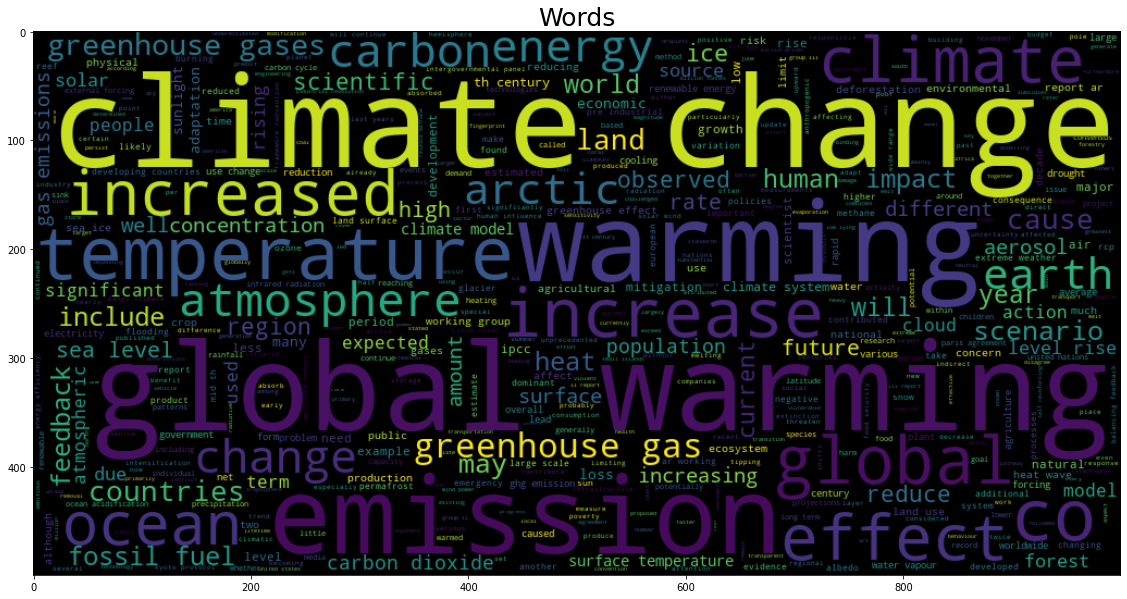

In [21]:
# Word cloud for the cleaned text.
plt.figure(figsize=(20,10))
WC = WordCloud(width=1000, height=500, max_words=500, min_font_size=5)
wc_clean_text = WC.generate(clean_text)
plt.imshow(wc_clean_text, interpolation='bilinear')
plt.title('Words', fontsize=25)
plt.show

In [0]:
# Tokenize sentences.
sentences = nltk.sent_tokenize(text)

In [0]:
#print(sentences)

In [0]:
# Stopword list.
stop_words = nltk.corpus.stopwords.words('english')

In [0]:
# Word counts.
word2count = {}
for word in nltk.word_tokenize(clean_text):
    if word not in stop_words:
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1

In [0]:
# Convert counts to weights.
max_count = max(word2count.values())
for key in word2count.keys():
    word2count[key] = word2count[key]/max_count

In [0]:
# Product sentence scores.
sent2score = {}
for sentence in sentences:
    for word in nltk.word_tokenize(sentence.lower()):
        if word in word2count.keys():
            if len(sentence.split(' ')) < 25:
                if sentence not in sent2score.keys():
                    sent2score[sentence] = word2count[word]
                else:
                    sent2score[sentence] += word2count[word]

In [0]:
# Get the optimal 3 lines.
n_sentences = 3
best_sentences = heapq.nlargest(n_sentences, sent2score, key=sent2score.get)

In [29]:
# Print 3 sentences.
for sentence in best_sentences:
    print(sentence, sep = "\n")

While aerosols typically limit global warming by reflecting sunlight, black carbon in soot that falls on snow or ice can contribute to global warming.
The long-term effects of global warming include further ice melt, ocean warming, sea level rise, and ocean acidification.
Countries work together on climate change under the umbrella of the United Nations Framework Convention on Climate Change (UNFCCC), which has near-universal membership.
